In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

directory = 'data'

df = pd.read_csv(directory + '/cleared_dataset.csv')
df

/var/folders/bh/d932d5zj56z9_y_7lh3s66ndf1n4c9/T/ipykernel_11154/1159173139.py:6: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(directory + '/cleared_dataset.csv')


,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа,МесяцДатыЗаказа
0,01.01.2017 17:15,04.01.2017,3530280_TR,Возврат из ПВЗ,2800.0,2800.0,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,2.0,0,01.01.2017,55575454-49504949555170,110109_nm19@gmail.com,Анжелика,IDL00023865048,0,-,1
1,01.01.2017 17:15,04.01.2017,3530280_TR,Возврат из ПВЗ,2800.0,2800.0,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,1.0,0,01.01.2017,55575454-49504949555170,110109_nm19@gmail.com,Анжелика,IDL00022519452,0,-,1
2,01.01.2017 17:38,03.01.2017,3530303_TR,К отгрузке,3585.0,3585.0,Курьерская,Наличная,Москва,ПОДГУЗНИКИ,...,1.0,0,01.01.2017,55574851-55555555555176,49117_1u16@mail.ru,Anastasia,IDL00038454553,0,-,1
3,01.01.2017 17:38,04.01.2017,3530318_TR,Доставлен,2510.0,2510.0,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,1.0,1,02.01.2017,55575054-56575354545171,115117_su21@mail.ru,Гость,IDL00035301654,0,-,1
4,01.01.2017 17:38,02.01.2017,3530313_TR,К отгрузке,1069.0,1069.0,Самовывоз,Наличная,Санкт-Петербург,ИГРУШКИ,...,1.0,1,02.01.2017,55575149-50524951545076,106117_ju18@yandex.ru,Гость,ID9010025983048,0,-,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4326294,24.01.2018 16:10,26.01.2018,7197353_TR,Доставлен,4029.0,3125.0,Магазины,Безналичная,Химки (Московская область район),ИГРУШКИ,...,1.0,1,24.01.2018,55574957-49485057515771,105117_iu24@mail.ru,Ирина,IDL00002922149,0,-,1
4326295,23.01.2018 17:42,31.01.2018,7189958_TR,Принят в ПВЗ,1645.0,1645.0,Магазины,Безналичная,Челябинск,ИГРУШКИ,...,17.0,1,23.01.2018,55574856-53565257495272,108117_lu17@mail.ru,Любовь,IDL00002922149,0,-,1
4326296,23.01.2018 23:56,26.01.2018,7196790_TR,К отгрузке,2095.0,2095.0,Pick point,Безналичная,Домодедово (Домодедовский район),ИГРУШКИ,...,4.0,1,23.01.2018,55574851-53575255565677,guest_103117_gu28@workmail.ru,Гость,IDL00002922149,0,-,1
4326297,23.01.2018 22:56,31.01.2018,7195888_TR,Доставлен,1519.0,1519.0,Магазины,Безналичная,Липецк,ИГРУШКИ,...,2.0,1,23.01.2018,55574852-50574855555171,118117_vu15@mail.ru,Анна,IDL00002922149,0,-,1


In [2]:
def toiso(x):
    year = x.split('.')[2]
    month = x.split('.')[1]
    day = x.split('.')[0]
    return year + '-' + month + '-' + day

df['Дата_день'] = df['Дата'].apply(lambda x: toiso(str(x).split()[0]))
df['Дата_день']

0          2017-01-01
1          2017-01-01
2          2017-01-01
3          2017-01-01
4          2017-01-01
              ...    
4326294    2018-01-24
4326295    2018-01-23
4326296    2018-01-23
4326297    2018-01-23
4326298    2018-01-23
Name: Дата_день, Length: 4326299, dtype: object

In [50]:
index = df['Дата_день'].value_counts().index
days = pd.DataFrame(index=index.sort_values())

def maketimeseries_days(df):
    placed = df[['Количество', 'Дата_день']].groupby(['Дата_день']).sum()
    placed.sort_values(by=['Дата_день'], inplace=True)
    redeemed = df[(df['Статус']=='Доставлен') & (df['НовыйСтатус']=='Доставлен')][['Количество', 'Дата_день']].groupby(['Дата_день']).sum()
    redeemed.sort_values(by=['Дата_день'], inplace=True)
    
    timeseries = days.join(placed, lsuffix='', rsuffix='')
    timeseries = timeseries.join(redeemed, lsuffix='_размещенные', rsuffix='_выкупленные')
    timeseries.fillna(0, inplace=True)
    
    timeseries['Количество_размещенные'] = timeseries['Количество_размещенные'].apply(lambda x: int(x))
    timeseries['Количество_выкупленные'] = timeseries['Количество_выкупленные'].apply(lambda x: int(x))
    return timeseries.copy()

In [51]:
timeseries_1 = maketimeseries_days(df[(df['Группа2'] == 'ИГРУШКИ')])
timeseries_1

,Количество_размещенные,Количество_выкупленные
Дата_день,,
2017-01-01,4,1
2017-01-02,1011,444
2017-01-03,677,308
2017-01-04,588,266
2017-01-05,716,306
...,...,...
2018-02-24,1863,1008
2018-02-25,2060,1146
2018-02-26,2567,1298


Text(0.5, 1.0, 'Кол-во товаров по дням (ИГРУШКИ)')

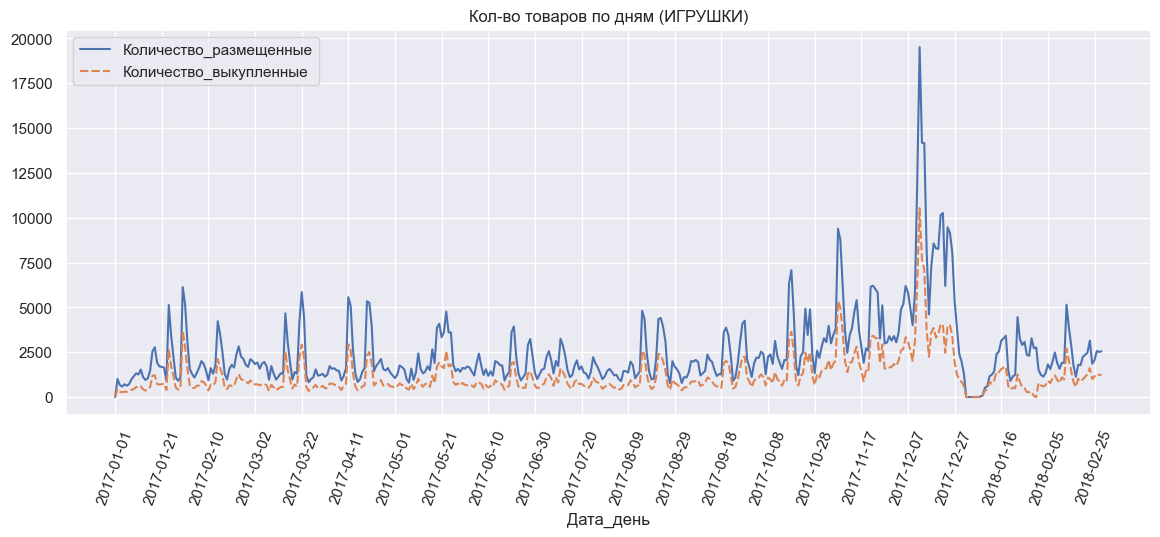

In [52]:
fig, ax = plt.subplots(figsize=(14, 5))
plt.xticks(rotation=70)
plt.xticks(list(range(0, len(days), 20)))
sns.lineplot(data=timeseries_1)
plt.title('Кол-во товаров по дням (ИГРУШКИ)')

In [53]:
timeseries_2 = maketimeseries_days(df[(df['Группа2'] == 'КОСМЕТИКА/ГИГИЕНА')])
timeseries_2

,Количество_размещенные,Количество_выкупленные
Дата_день,,
2017-01-01,1,0
2017-01-02,550,199
2017-01-03,543,126
2017-01-04,492,157
2017-01-05,431,150
...,...,...
2018-02-24,804,409
2018-02-25,799,472
2018-02-26,1115,491


Text(0.5, 1.0, 'Кол-во товаров по дням (КОСМЕТИКА/ГИГИЕНА)')

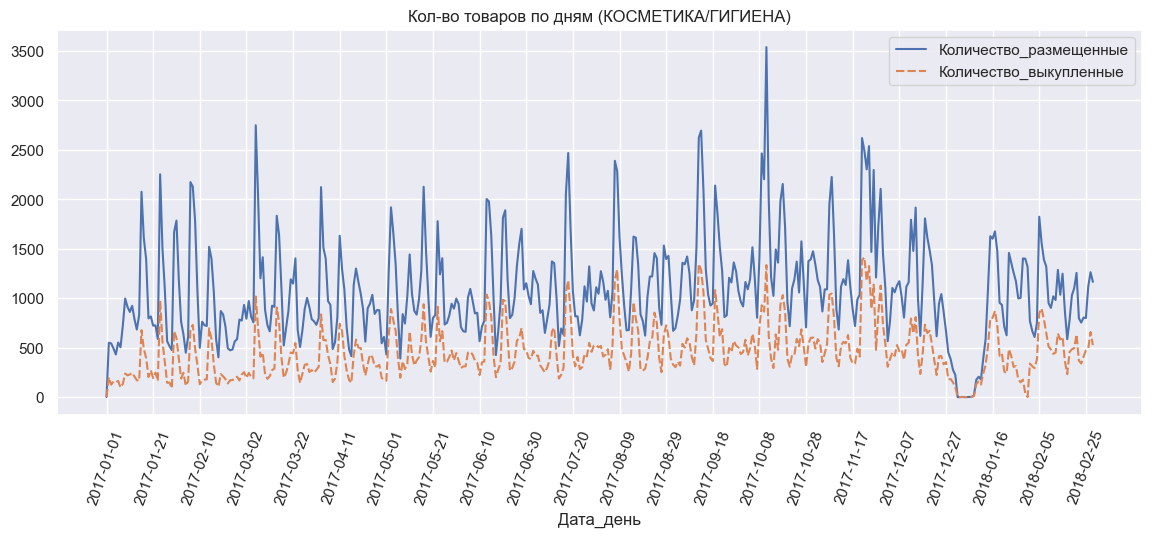

In [54]:
fig, ax = plt.subplots(figsize=(14, 5))
plt.xticks(rotation=70)
plt.xticks(list(range(0, len(days), 20)))
sns.lineplot(data=timeseries_2)
plt.title('Кол-во товаров по дням (КОСМЕТИКА/ГИГИЕНА)')

In [55]:
timeseries_3 = maketimeseries_days(df[(df['Группа2'] == 'КРУПНОГАБАРИТНЫЙ ТОВАР')])
timeseries_3

,Количество_размещенные,Количество_выкупленные
Дата_день,,
2017-01-01,5,2
2017-01-02,325,138
2017-01-03,237,98
2017-01-04,236,114
2017-01-05,227,93
...,...,...
2018-02-24,507,295
2018-02-25,502,267
2018-02-26,575,283


Text(0.5, 1.0, 'Кол-во товаров по дням (КРУПНОГАБАРИТНЫЙ ТОВАР)')

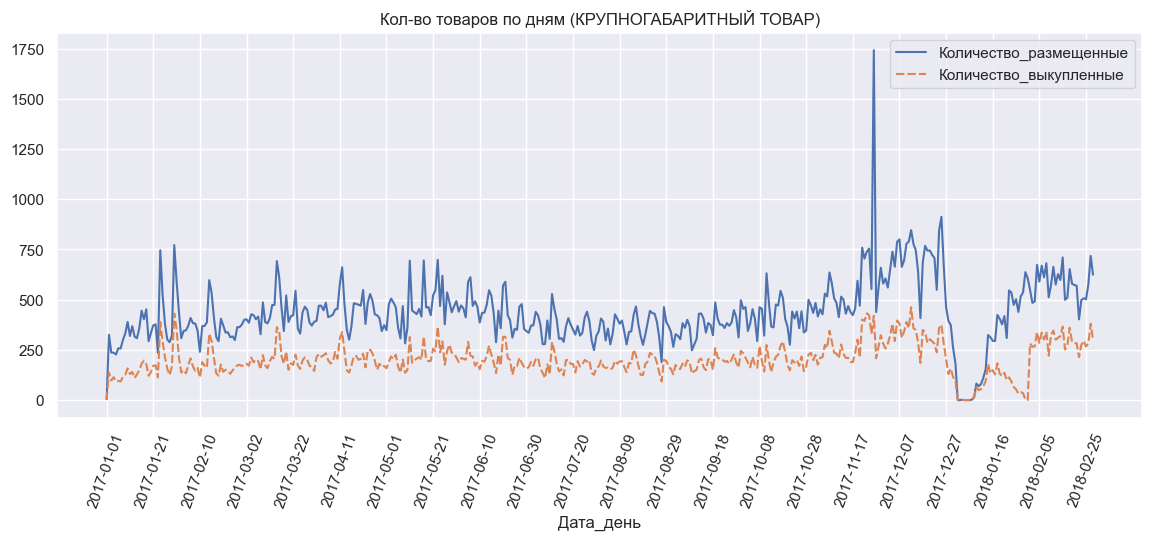

In [56]:
fig, ax = plt.subplots(figsize=(14, 5))
plt.xticks(rotation=70)
plt.xticks(list(range(0, len(days), 20)))
sns.lineplot(data=timeseries_3)
plt.title('Кол-во товаров по дням (КРУПНОГАБАРИТНЫЙ ТОВАР)')

Text(0.5, 1.0, 'Кол-во товаров по дням (ИГРУШКИ | КОНСТРУКТОРЫ)')

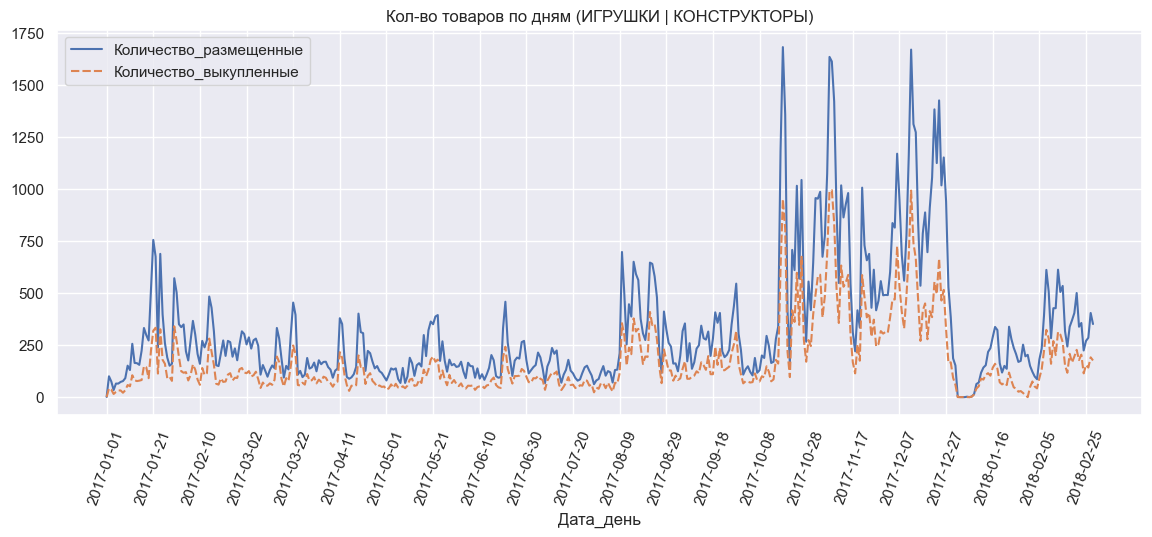

In [59]:
timeseries_4 = maketimeseries_days(df[(df['Группа2'] == 'ИГРУШКИ') & (df['Группа3'] == 'КОНСТРУКТОРЫ')])
fig, ax = plt.subplots(figsize=(14, 5))
plt.xticks(rotation=70)
plt.xticks(list(range(0, len(days), 20)))
sns.lineplot(data=timeseries_4)
plt.title('Кол-во товаров по дням (ИГРУШКИ | КОНСТРУКТОРЫ)')

Text(0.5, 1.0, 'Кол-во товаров по дням (ИГРУШКИ | ВСЁ ДЛЯ ПРАЗДНИКА)')

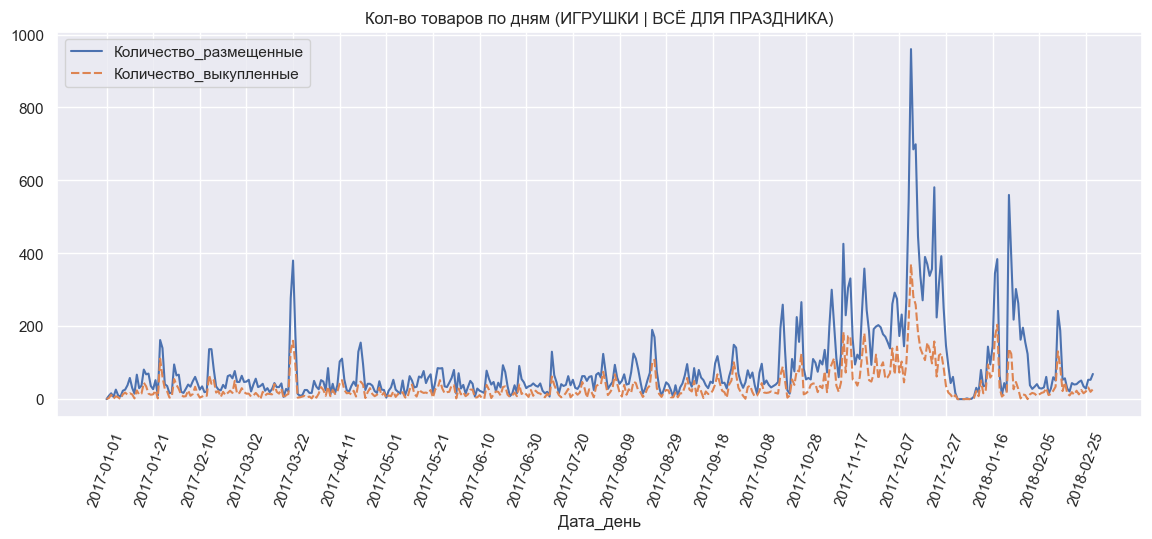

In [60]:
timeseries_5 = maketimeseries_days(df[(df['Группа2'] == 'ИГРУШКИ') & (df['Группа3'] == 'ВСЁ ДЛЯ ПРАЗДНИКА')])
fig, ax = plt.subplots(figsize=(14, 5))
plt.xticks(rotation=70)
plt.xticks(list(range(0, len(days), 20)))
sns.lineplot(data=timeseries_5)
plt.title('Кол-во товаров по дням (ИГРУШКИ | ВСЁ ДЛЯ ПРАЗДНИКА)')

Text(0.5, 1.0, 'Кол-во товаров по дням (КОСМЕТИКА/ГИГИЕНА | СРЕДСТВА БЫТОВОЙ ХИМИИ)')

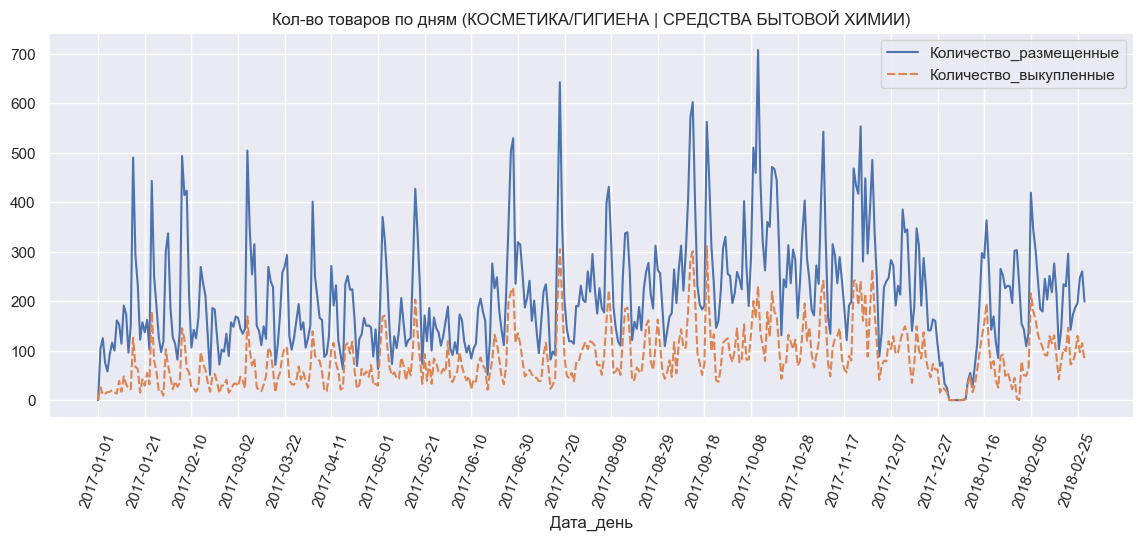

In [61]:
timeseries_6 = maketimeseries_days(df[(df['Группа2'] == 'КОСМЕТИКА/ГИГИЕНА') & (df['Группа3'] == 'СРЕДСТВА БЫТОВОЙ ХИМИИ')])
fig, ax = plt.subplots(figsize=(14, 5))
plt.xticks(rotation=70)
plt.xticks(list(range(0, len(days), 20)))
sns.lineplot(data=timeseries_6)
plt.title('Кол-во товаров по дням (КОСМЕТИКА/ГИГИЕНА | СРЕДСТВА БЫТОВОЙ ХИМИИ)')

Text(0.5, 1.0, 'Кол-во товаров по дням (КОСМЕТИКА/ГИГИЕНА | СРЕДСТВА ГИГИЕНЫ)')

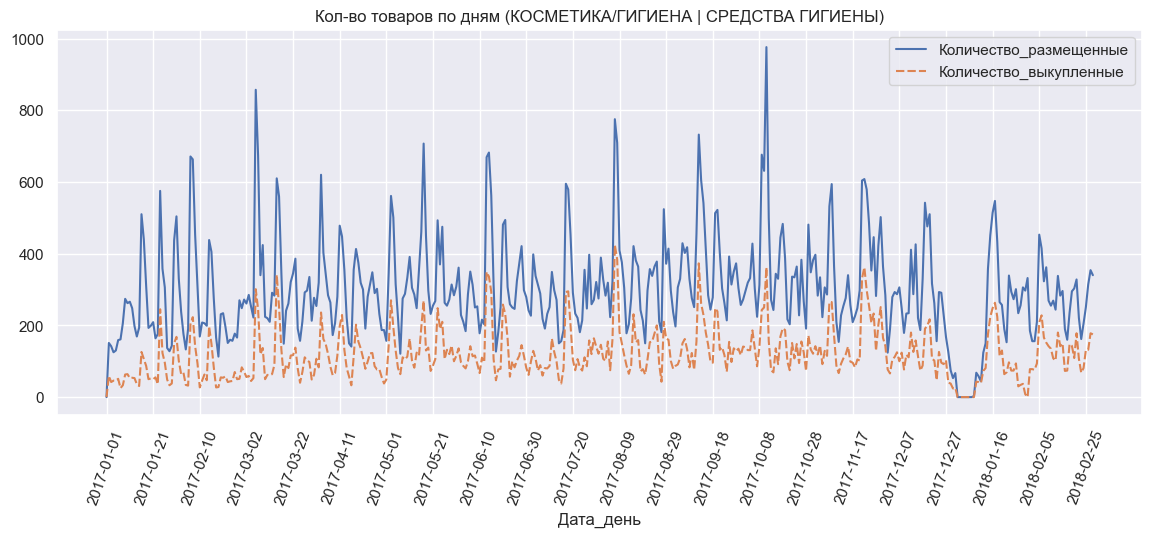

In [62]:
timeseries_7 = maketimeseries_days(df[(df['Группа2'] == 'КОСМЕТИКА/ГИГИЕНА') & (df['Группа3'] == 'СРЕДСТВА ГИГИЕНЫ')])
fig, ax = plt.subplots(figsize=(14, 5))
plt.xticks(rotation=70)
plt.xticks(list(range(0, len(days), 20)))
sns.lineplot(data=timeseries_7)
plt.title('Кол-во товаров по дням (КОСМЕТИКА/ГИГИЕНА | СРЕДСТВА ГИГИЕНЫ)')

Text(0.5, 1.0, 'Кол-во товаров по дням (КРУПНОГАБАРИТНЫЙ ТОВАР | ВЕЛОСИПЕДЫ/САМОКАТЫ)')

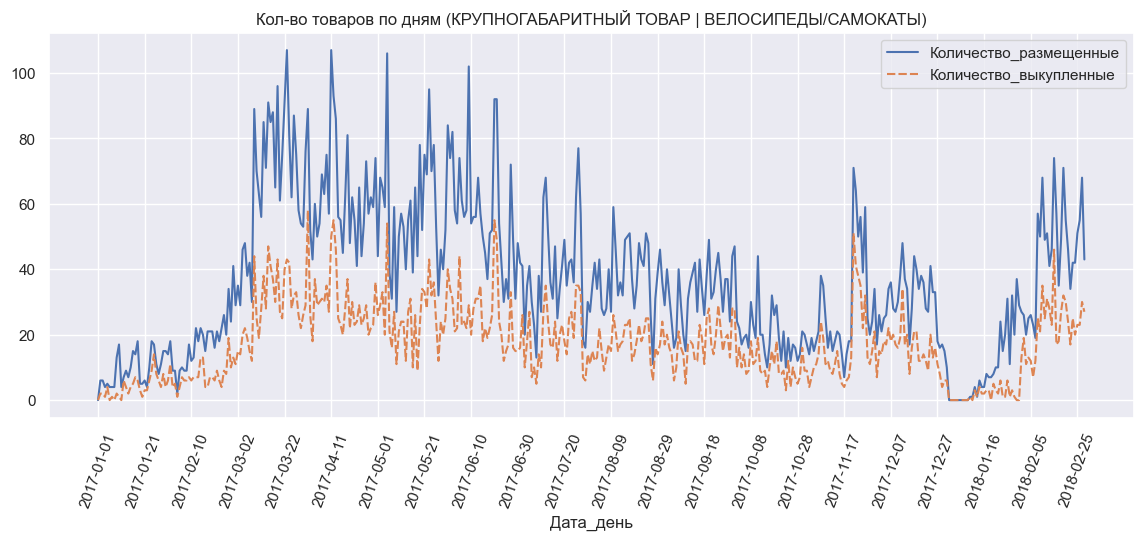

In [65]:
timeseries_8 = maketimeseries_days(df[(df['Группа2'] == 'КРУПНОГАБАРИТНЫЙ ТОВАР') & (df['Группа3'] == 'ВЕЛОСИПЕДЫ/САМОКАТЫ')])
fig, ax = plt.subplots(figsize=(14, 5))
plt.xticks(rotation=70)
plt.xticks(list(range(0, len(days), 20)))
sns.lineplot(data=timeseries_8)
plt.title('Кол-во товаров по дням (КРУПНОГАБАРИТНЫЙ ТОВАР | ВЕЛОСИПЕДЫ/САМОКАТЫ)')

Text(0.5, 1.0, 'Кол-во товаров по дням (КРУПНОГАБАРИТНЫЙ ТОВАР | ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ)')

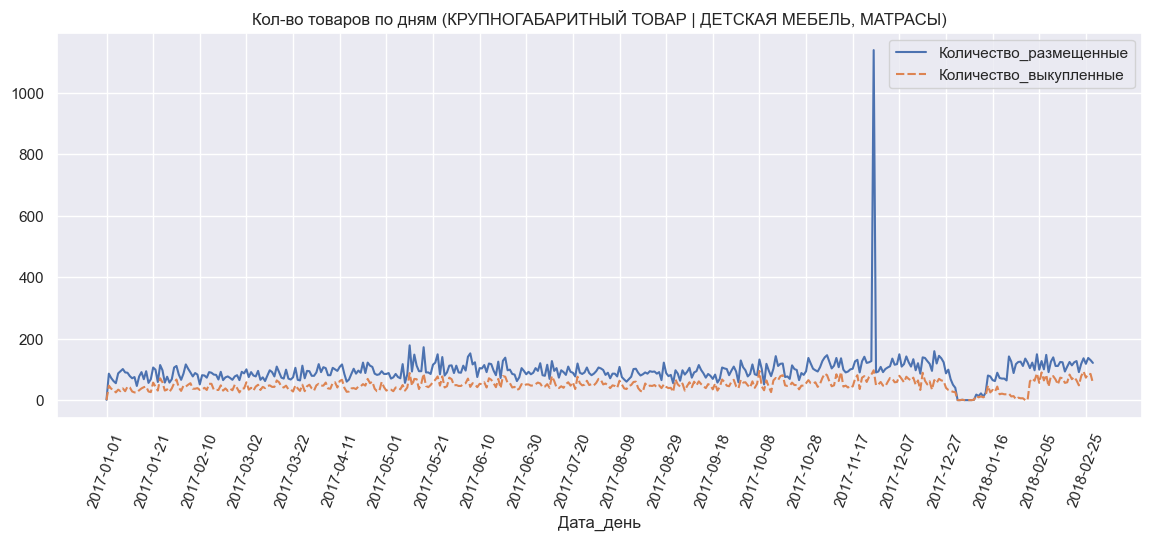

In [66]:
timeseries_9 = maketimeseries_days(df[(df['Группа2'] == 'КРУПНОГАБАРИТНЫЙ ТОВАР') & (df['Группа3'] == 'ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ')])
fig, ax = plt.subplots(figsize=(14, 5))
plt.xticks(rotation=70)
plt.xticks(list(range(0, len(days), 20)))
sns.lineplot(data=timeseries_9)
plt.title('Кол-во товаров по дням (КРУПНОГАБАРИТНЫЙ ТОВАР | ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ)')

In [64]:
df[(df['Группа2'] == 'КРУПНОГАБАРИТНЫЙ ТОВАР') & (df['Группа3'] == 'ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ')]['Группа4'].value_counts()

Группа4
горшки                         6659
горки и сидения для купания    5012
аксессуары для купания         4583
ванны                          4202
накладки на унитаз             1789
разное (баки, ведра, тазы)     1332
мебель пластик                 1263
подставки/ступени              1228
подставки под ванну             380
Name: count, dtype: int64

In [68]:
timeseries_1.to_csv('./statistics/timeseries_days_ИГРУШКИ')

In [69]:
timeseries_2.to_csv('./statistics/timeseries_days_КОСМЕТИКА_ГИГИЕНА')

In [70]:
timeseries_3.to_csv('./statistics/timeseries_days_КРУПНОГАБАРИТНЫЙ_ТОВАР')

In [71]:
timeseries_4.to_csv('./statistics/timeseries_days_ИГРУШКИ-КОНСТРУКТОРЫ')

In [72]:
timeseries_5.to_csv('./statistics/timeseries_days_ИГРУШКИ-ВСЁ_ДЛЯ_ПРАЗДНИКА')

In [73]:
timeseries_6.to_csv('./statistics/timeseries_days_КОСМЕТИКА_ГИГИЕНА-СРЕДСТВА_БЫТОВОЙ_ХИМИИ')
timeseries_7.to_csv('./statistics/timeseries_days_КОСМЕТИКА_ГИГИЕНА-СРЕДСТВА_ГИГИЕНЫ')

In [74]:
timeseries_8.to_csv('./statistics/timeseries_days_КРУПНОГАБАРИТНЫЙ_ТОВАР-ВЕЛОСИПЕДЫ_САМОКАТЫ')
timeseries_9.to_csv('./statistics/timeseries_days_КРУПНОГАБАРИТНЫЙ_ТОВАР-ДЕТСКАЯ_МЕБЕЛЬ_МАТРАСЫ')